# Store netCDF output

In [1]:
import matplotlib.pyplot as plt
import netCDF4
from typhon import plots

import konrad


plots.styles.use("typhon")

During the configuration of an RCE simulation we can specify an output netCDF file.
Konrad will create the file and store a snapshot of the instantaneous model state at a given output frequency.

In [2]:
plev, phlev = konrad.utils.get_pressure_grids(1000e2, 1, 128)
atmosphere = konrad.atmosphere.Atmosphere(phlev)

rce = konrad.RCE(
    atmosphere,
    surface=konrad.surface.FixedTemperature(temperature=288.),  # Run with a fixed surface temperature.
    timestep='12h',  # Set timestep in model time.
    max_duration='100d',  # Set maximum runtime.
    outfile="my_rce_output.nc",  # Specifiy the output file
    writeevery="5d",  # Set the output frequency
)
rce.run()

## Read and visualize model output

After the run has finished, we can use the `netCDF4` package to read the data again.
Here, we plot the temporal evolution of the temperature profile from the inital US standard atmosphere towards the equilibrium RCE state.

Text(0, 0.5, '$p$ / hPa')

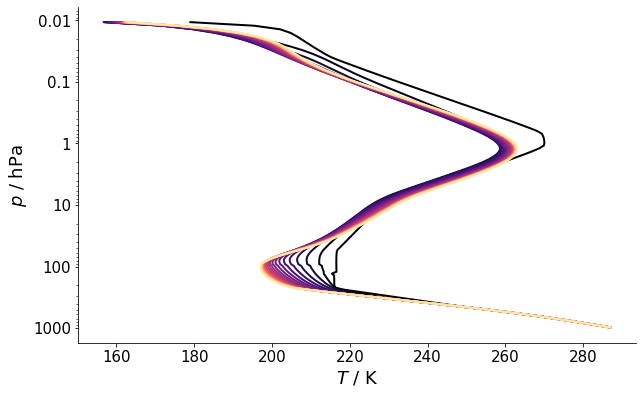

In [3]:
with netCDF4.Dataset("my_rce_output.nc", "r") as root:
    p = root["plev"][:]
    T = root["atmosphere/T"][:]

sm = plt.cm.ScalarMappable(norm=plt.Normalize(0, T.shape[0]), cmap="magma")

fig, ax = plt.subplots()
for i, temp in enumerate(T):
    plots.profile_p_log(p, temp, linestyle="solid", color=sm.to_rgba(i))
ax.set_xlabel(r"$T$ / K")
ax.set_ylabel(r"$p$ / hPa")